## Exploring dataset

### Importing dataset

In [336]:
import pandas as pd

In [416]:
train_df = pd.read_csv("diabetic_data_train.csv",index_col=0)
test_df = pd.read_csv("diabetic_data_test.csv",index_col=0)

#### Top 5 rows of the training dataset

In [338]:
train_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
93634,338369606,159605546,AfricanAmerican,Male,[70-80),?,1,23,7,3,...,No,No,No,No,No,No,No,No,No,NO
27698,90739116,83232054,Caucasian,Female,[70-80),[75-100),3,1,1,1,...,No,No,No,No,No,No,No,No,No,NO
17488,64286964,95117913,Caucasian,Male,[60-70),?,3,1,1,4,...,No,No,No,No,No,No,No,Ch,Yes,>30
96510,376610012,136697972,AfricanAmerican,Male,[40-50),?,3,1,1,2,...,No,No,No,No,No,No,No,No,No,NO
35774,110557278,2851308,Caucasian,Male,[80-90),?,1,1,6,1,...,No,No,No,No,No,No,No,No,No,NO


#### Checking null values

The dataset has '?' as placeholder for missing values. Replacing it with null to use native method for null check.

In [432]:
import numpy as np
# Replace '?' with null
train_df.replace('?',np.nan,inplace=True)
test_df.replace('?',np.nan,inplace=True)

# Checking null values across dataset
train_df[pd.isna(train_df).any(axis=1)]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
93634,338369606,159605546,AfricanAmerican,Male,[70-80),NaN,1,23,7,3,...,No,No,No,No,No,No,No,No,No,NO
17488,64286964,95117913,Caucasian,Male,[60-70),NaN,3,1,1,4,...,No,No,No,No,No,No,No,Ch,Yes,>30
96510,376610012,136697972,AfricanAmerican,Male,[40-50),NaN,3,1,1,2,...,No,No,No,No,No,No,No,No,No,NO
35774,110557278,2851308,Caucasian,Male,[80-90),NaN,1,1,6,1,...,No,No,No,No,No,No,No,No,No,NO
74984,224162346,109195155,Caucasian,Male,[80-90),NaN,1,6,7,2,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44140,136191846,25106184,AfricanAmerican,Male,[70-80),NaN,3,6,1,14,...,No,No,No,No,No,No,No,No,Yes,>30
39623,123216078,23313015,AfricanAmerican,Female,[80-90),NaN,1,3,7,5,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
97220,386036246,90035649,Caucasian,Male,[80-90),NaN,2,1,7,3,...,No,No,No,No,No,No,No,No,No,NO
38664,120178062,24934599,Caucasian,Male,[40-50),NaN,1,7,7,2,...,No,Steady,No,No,No,No,No,No,Yes,>30


#### Checking for duplicate values

In [340]:
columns = [col for col in train_df.columns if col not in ['encounter_id','patient_nbr'] ]
print("Percentage of duplicate rows found: ", 
      (1 - train_df.drop_duplicates(subset=columns, keep='first').shape[0]/ train_df.shape[0]) * 100,
     "%")

Percentage of duplicate rows found:  0.0 %


No duplicate records found.

#### Checking percentage of null values across features (columns)

In [341]:
# Columns null values percentage
(pd.isna(train_df).sum() / train_df.shape[0] ) * 100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.237828
gender                       0.000000
age                          0.000000
weight                      96.869923
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.369006
medical_specialty           49.109061
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.026204
diag_2                       0.361616
diag_3                       1.416330
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

It can be seen that the columns weight, payer_code and medical_speciality has high percentage of null values. Hence dropping these columns in the later stage of preprocessing. 

#### The dataset has large number of columns (50), which can lead to increase in complexity of the model

In [342]:
print("Columns of the dataset:")
train_df.columns

Columns of the dataset:


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [343]:
print("Column count :", train_df.shape[1])
print("Row count :", train_df.shape[0])

Column count : 50
Row count : 76324


#### Categorizing columns

In [344]:
numerical_attr = []
categorical_attr = []
for feature,datatype in zip(train_df.columns,train_df.dtypes):
    if datatype != 'object':
        numerical_attr.append(feature)
    else:
        categorical_attr.append(feature)
print("Numerical attributes: \n", numerical_attr)
print("\nNumerical attributes count: ", len(numerical_attr))
print("-"*50)
print("Categorical attributes: \n", categorical_attr)
print("\nCategorical attributes count: ", len(categorical_attr))

Numerical attributes: 
 ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

Numerical attributes count:  13
--------------------------------------------------
Categorical attributes: 
 ['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

Categorical attributes count:  37


#### Observations from [research paper](https://downloads.hindawi.com/journals/bmri/2014/781670.pdf) and problem description.
* Features such as `encounter_id`, `patient_id`, `admission_type_id`, `discharge_disposition_id`, `admission_source_id` are nominal. Hence they can be one-hot encoded.

In [345]:
# Removing categorical features from numerical_attr
numerical_attr.remove('encounter_id')
numerical_attr.remove('patient_nbr')
numerical_attr.remove('admission_type_id')
numerical_attr.remove('discharge_disposition_id')
numerical_attr.remove('admission_source_id')

# Adding removed categorical features to categorical_attr
categorical_attr.append('encounter_id')
categorical_attr.append('patient_nbr')
categorical_attr.append('admission_type_id')
categorical_attr.append('discharge_disposition_id')
categorical_attr.append('admission_source_id')

#### Checking values distribution of categorical columns

In [346]:
for col in categorical_attr:
    print("Column name: ", col)
    print(train_df[col].value_counts())
    print("\n")

Column name:  race
Caucasian          56938
AfricanAmerican    14519
Hispanic            1518
Other               1160
Asian                481
Name: race, dtype: int64


Column name:  gender
Female             41008
Male               35313
Unknown/Invalid        3
Name: gender, dtype: int64


Column name:  age
[70-80)     19473
[60-70)     16772
[50-60)     13056
[80-90)     12870
[40-50)      7331
[30-40)      2821
[90-100)     2128
[20-30)      1252
[10-20)       501
[0-10)        120
Name: age, dtype: int64


Column name:  weight
[75-100)     997
[50-75)      688
[100-125)    448
[125-150)    107
[25-50)       82
[0-25)        32
[150-175)     29
>200           3
[175-200)      3
Name: weight, dtype: int64


Column name:  payer_code
MC    24276
HM     4759
SP     3785
BC     3541
MD     2640
CP     1907
UN     1834
CM     1483
OG      790
PO      447
DM      423
CH      107
WC      105
OT       73
MP       60
SI       45
FR        1
Name: payer_code, dtype: int64


Column name:  m

* `encounter_id` is nominal and has unique values for each record. Hence, not considering it for the model training.
* `patient_nbr` identifies each patient uniquely, it can be predictor for existing patients but not for new patients. Hence, not considering it for model training.
* Column `acetohexamide` has just 1 value of category 'Steady', and rest all values are of the category 'No'. Hence we can remove it since it becomes insignificant.
* Column `tolbutamide` has just 15 value of category 'Steady', and rest all values are of the category 'No'. Hence we can remove it since it becomes insignificant.
* Column `repaglinide` is highly imbalanced. Hence not considering it for model training.
* Column `nateglinide` is highly imbalanced. Hence not considering it for model training.
* Column `chlorpropamide` is highly imbalanced. Hence not considering it for model training.
* Column `acarbose` is highly imbalanced. Hence not considering it for model training.
* Column `miglitol` is highly imbalanced. Hence not considering it for model training.
* Column `troglitazone` is highly imbalanced. Hence not considering it for model training.
* Column `tolazamide` is highly imbalanced. Hence not considering it for model training.
* Column `examide` is highly imbalanced. Hence not considering it for model training.
* Column `citoglipton` is highly imbalanced. Hence not considering it for model training.
* Column `glyburide-metformin` is highly imbalanced. Hence not considering it for model training.
* Column `glipizide-metformin` is highly imbalanced. Hence not considering it for model training.
* Column `glimepiride-pioglitazone` is highly imbalanced. Hence not considering it for model training.
* Column `metformin-rosiglitazone` is highly imbalanced. Hence not considering it for model training.

### Updating categorical features as the per above observation

In [351]:
# Remove columns from categorical_attr
categorical_attr.remove('encounter_id')
categorical_attr.remove('patient_nbr')
categorical_attr.remove('acetohexamide')
categorical_attr.remove('tolbutamide')
categorical_attr.remove('repaglinide')
categorical_attr.remove('nateglinide')
categorical_attr.remove('chlorpropamide')
categorical_attr.remove('acarbose')
categorical_attr.remove('miglitol')
categorical_attr.remove('troglitazone')
categorical_attr.remove('tolazamide')
categorical_attr.remove('examide')
categorical_attr.remove('citoglipton')
categorical_attr.remove('glyburide-metformin')
categorical_attr.remove('glipizide-metformin')
categorical_attr.remove('metformin-rosiglitazone')
categorical_attr.remove('weight')
categorical_attr.remove('payer_code')
categorical_attr.remove('medical_specialty')

#### Removing readmitted column as it is the response variable

In [353]:
categorical_attr.remove('readmitted')

#### Categorical features are updation

In [354]:
print("Categorical features:\n",categorical_attr)
print("\nCount: ",len(categorical_attr))

Categorical features:
 ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']

Count:  22


#### Exploring numerical attributes

In [355]:
train_df.loc[:,numerical_attr].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000,76324.000000
mean,4.400084,43.136445,1.335163,16.025942,0.375046,0.200985,0.639432,7.423602
std,2.985689,19.673383,1.701378,8.119375,1.291108,0.936242,1.273049,1.938609
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


#### Checking correlation among the features

In [377]:
import matplotlib.pyplot as plt
train_df.loc[:,numerical_attr].corr().style.background_gradient(plt.cm.binary, axis=1)

,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
num_medications,1.000000,0.044029,0.014633,0.065661,0.263149
number_outpatient,0.044029,1.000000,0.095252,0.107266,0.096441
number_emergency,0.014633,0.095252,1.000000,0.267293,0.056696
number_inpatient,0.065661,0.107266,0.267293,1.000000,0.106394
number_diagnoses,0.263149,0.096441,0.056696,0.106394,1.000000


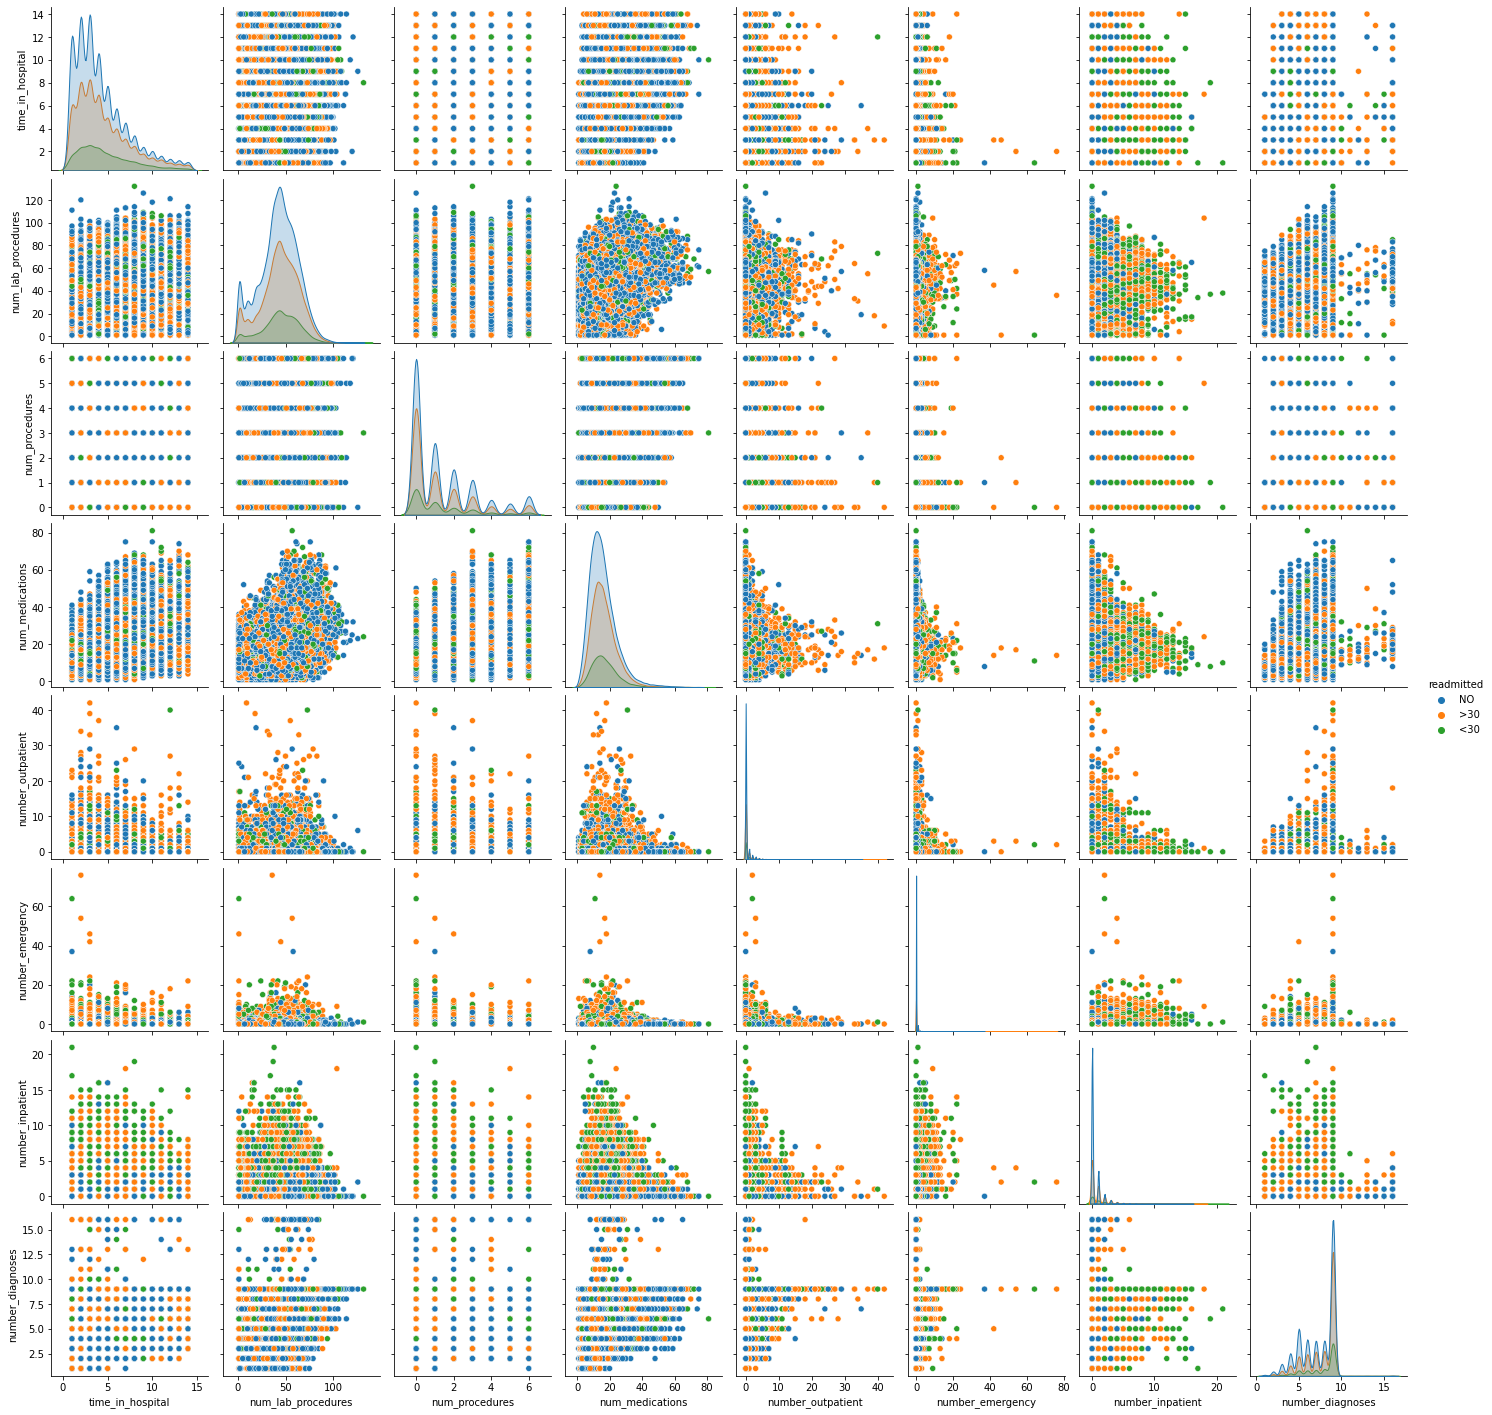

In [367]:
import seaborn as sns
sns.pairplot(vars=numerical_attr, data=train_df, hue="readmitted")

#### Observations
* `readmitted` classes are not well separated for any pair of combination of numerical attributes.
* `num_medication` has good correlation with `time_in_hospital`, `num_lab_procedures` and `num_procedures`.

#### Updating numeircal attributes based on above observation

In [370]:
# Removing numerical attributes which have good correlation
numerical_attr.remove('time_in_hospital')
numerical_attr.remove('num_lab_procedures')
numerical_attr.remove('num_procedures')

#### Exploring categorical attributes

['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']


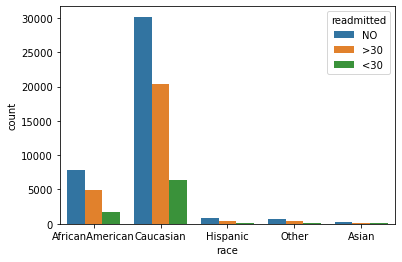

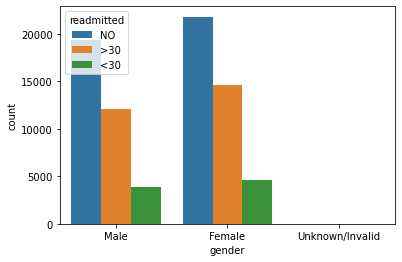

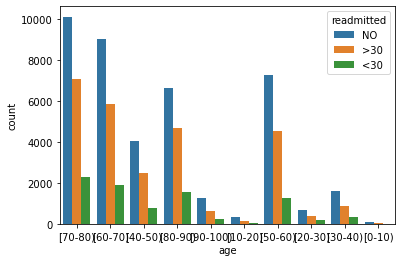

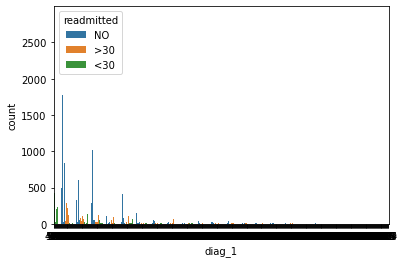

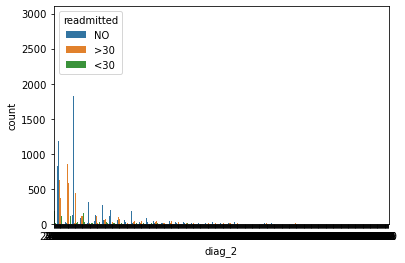

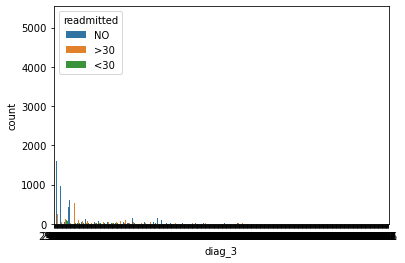

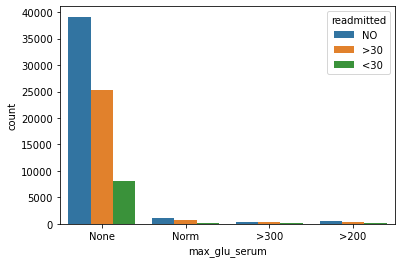

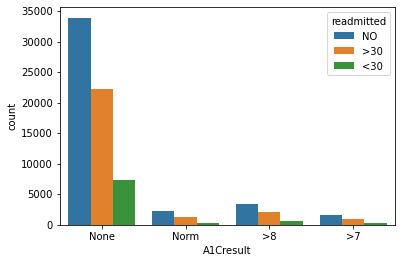

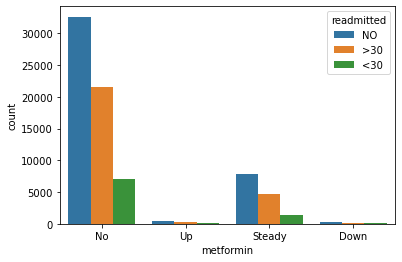

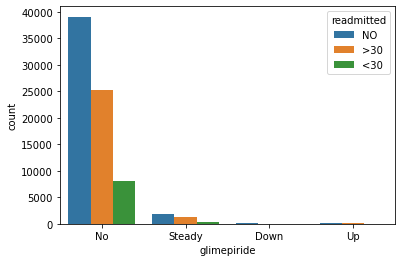

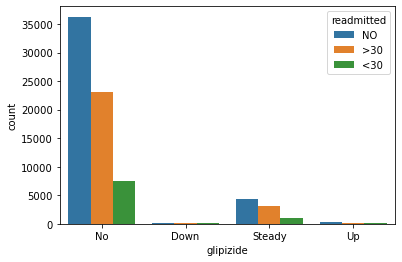

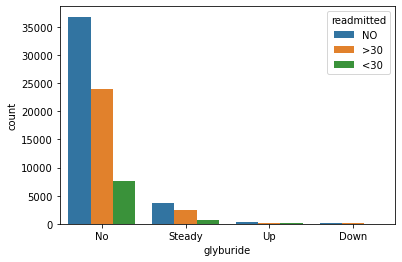

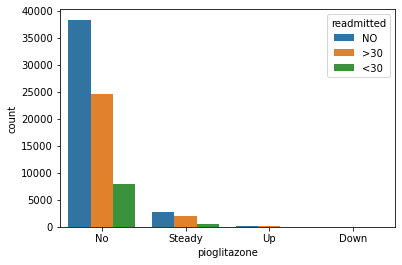

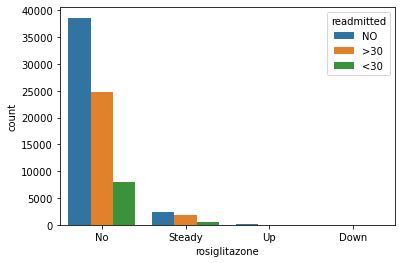

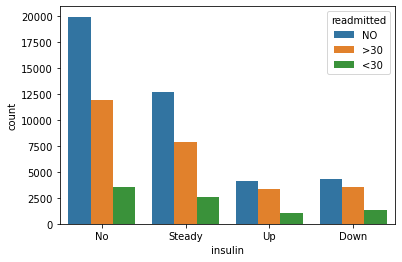

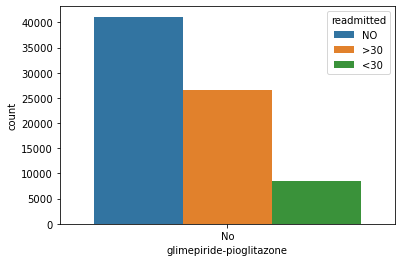

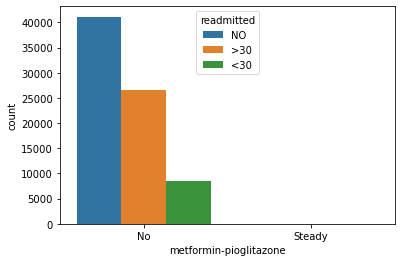

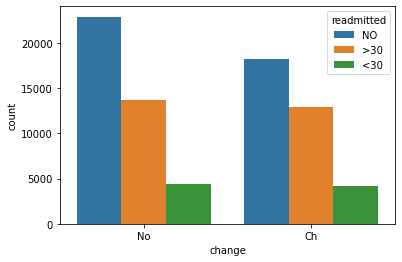

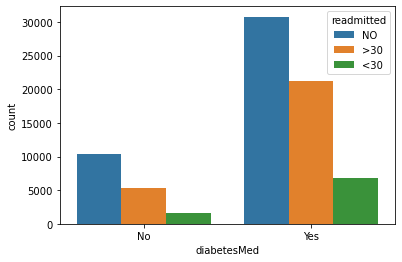

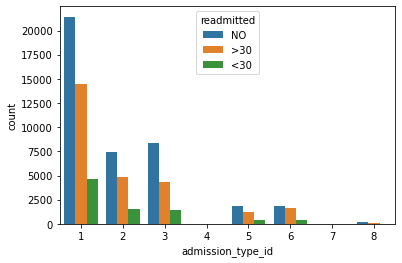

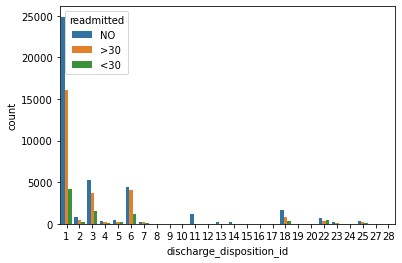

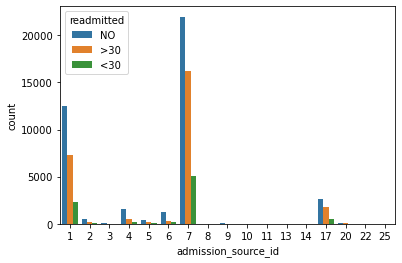

In [378]:
print(categorical_attr)
for cat_col in categorical_attr:
    sns.countplot(data=train_df,hue='readmitted',x=cat_col)
    plt.show()

#### Checking unique values in each categorical feature

In [383]:
for cat_col in categorical_attr:
    print(cat_col, " : ", len(train_df[cat_col].unique()))

race  :  6
gender  :  3
age  :  10
diag_1  :  693
diag_2  :  716
diag_3  :  750
max_glu_serum  :  4
A1Cresult  :  4
metformin  :  4
glimepiride  :  4
glipizide  :  4
glyburide  :  4
pioglitazone  :  4
rosiglitazone  :  4
insulin  :  4
glimepiride-pioglitazone  :  1
metformin-pioglitazone  :  2
change  :  2
diabetesMed  :  2
admission_type_id  :  8
discharge_disposition_id  :  26
admission_source_id  :  17


#### Observations
* Categorical data is also highly imbalanced.
* All three classes of the `readmitted` columns are not well separted here as well.
* For almost all categorical features the distribution `readmitted` is follows similar distribution.
* `diag_1`, `diag_2`, `diag_3` has large number of categories around 700 each. It can further sub categorised into 9 groups based on `icd9` codes.

#### Checking the distribution of output class ('readmitted')

In [379]:
print("Percentage distribution of the output class: ")
(train_df['readmitted'].value_counts() / train_df.shape[0]) * 100

Percentage distribution of the output class: 


NO     53.912269
>30    34.927415
<30    11.160317
Name: readmitted, dtype: float64

It can be seen that the class is highly imbalanced. The class '<30' in which we are interested has the least distribution of 11% approx.

### Observation from data exploration
* Data is highly imbalanced, that included response variable as well as categorical.
* Accuracy would not be a good measure to evaluate the model.
* Precision, recall and f1 score would give a better representation of model performance.

## Preprocessing the data

#### Quantizing diag_1,diag_2,diag_3 columns

In [419]:
from sklearn.preprocessing import FunctionTransformer

def quantize_diag(df):
    res = {}
    for col in df.columns:
        res[col] = []
        for indx, val in df[col].items():
            output = None
            if val is None or not(pd.notnull(val)):
                pass
            elif "E" in val or "V" in val or "?" in val:
                output = 'Other'
            elif int(float(val)) >= 740 and int(float(val)) <= 759 :
                output = 'Other'
            elif int(float(val)) >= 360 and int(float(val)) <= 389 :
                output = 'Other'
            elif int(float(val)) >= 630 and int(float(val)) <= 679 :
                output = 'Other'
            elif int(float(val)) >= 320 and int(float(val)) <= 359 :
                output = 'Other'
            elif int(float(val)) >= 280 and int(float(val)) <= 289 :
                output = 'Other'
            elif int(float(val)) >= 290 and int(float(val)) <= 319 :
                output = 'Other'
            elif int(float(val)) >= 1 and int(float(val)) <= 139 :
                output = 'Neoplasms'
            elif int(float(val)) >= 680 and int(float(val)) <= 709 :
                output = 'Neoplasms'
            elif int(float(val)) in [782,780,781,784] :
                output = 'Neoplasms'
            elif int(float(val)) >= 240 and int(float(val)) <= 279 and int(float(val)) != 250 :
                output = 'Neoplasms'
            elif int(float(val)) >= 790 and int(float(val)) <= 799 :
                output = 'Neoplasms'
            elif int(float(val)) >= 140 and int(float(val)) <= 239 :
                output = 'Neoplasms'
            elif (int(float(val)) >= 580 and int(float(val)) <= 629) or  int(float(val)) >= 788:
                output = 'Genitourinary'
            elif int(float(val)) >= 710 and int(float(val)) <= 739 :
                output = 'Musculoskeletal'
            elif int(float(val)) >= 800 and int(float(val)) <= 999 :
                output = 'Injury'
            elif int(float(val)) == 250:
                output = 'Diabetes'
            elif (int(float(val)) >= 520 and int(float(val)) <= 579) or  int(float(val)) <= 787:
                output = 'Digestive'
            elif (int(float(val)) >= 460 and int(float(val)) <= 519) or  int(float(val)) <= 786:
                output = 'Respiratory'
            elif (int(float(val)) >= 390 and int(float(val)) <= 459) or  int(float(val)) <= 785:
                output = 'Circulatory'
            res[col].append(output)
    return pd.DataFrame(res)
        
diag_transformer = FunctionTransformer(quantize_diag,validate=False)


#### Imputing missing values for numerical and categorical data and preprocessing categorical features

In [421]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Pipeline to process numerical values with median for missing values
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ("standardize", StandardScaler())]
)

# Pipeline to process categorical values with most frequent for missing values
# and then using one hot encoding.
categorical_transformer = Pipeline(
    steps=[("cat_imputer",SimpleImputer(strategy="most_frequent")),
           ("one_hot",OneHotEncoder())])
#            ("base_encoding",ce.BaseNEncoder(base=2))])

cat_transformer_cols = categorical_attr.copy()
cat_transformer_cols.remove('diag_1')
cat_transformer_cols.remove('diag_2')
cat_transformer_cols.remove('diag_3')


diag_transformer = Pipeline(
    steps=[("quantizing",diag_transformer),
           ("one_hot",OneHotEncoder())])
diag_transformer_cols = ['diag_1','diag_2','diag_3']

# Final pipeline combining above pipelines to create a workflow for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_attr),
        ("cat", categorical_transformer, cat_transformer_cols),
        ("diag_tf", diag_transformer, diag_transformer_cols)
    ]
)


#### Fitting data on combined test and train so as to account for class types

In [528]:
preprocessor.fit(pd.concat([train_df.loc[:, train_df.columns != 'readmitted'],test_df.loc[:, test_df.columns != 'readmitted']]))

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['num_medications', 'number_outpatient',
                                  'number_emergency', 'number_inpatient',
                                  'number_diagnoses']),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot', OneHotEncoder())]),
                                 ['race',...
                                  'glipizide', 'glyburide', 'pioglitazone',
                                  'rosiglitazone', 'insulin',
             

#### Transforming the training data with the above preprocessor

In [529]:
tf_train_df = preprocessor.transform(train_df.loc[:, train_df.columns != 'readmitted'])

Shape of the training dataset after processing

In [530]:
print("Transformed training dataset rows: ",tf_train_df.shape[0])
print("Transformed training dataset rows: ",tf_train_df.shape[1])
tf_train_df.shape

Transformed training dataset rows:  76324
Transformed training dataset rows:  139


(76324, 139)

#### Since our main objective is binary classification, will merge classes `NO` and `>30` together as `NO`

In [550]:
# Merging '>30' class into 'NO' for train data
y_train_relabeled = train_df['readmitted'].replace('>30','NO',inplace=False)

# Merging '>30' class into 'NO' for test data
y_test_relabeled = test_df['readmitted'].replace('>30','NO',inplace=False)

#### Checking distribution of classes after merging

In [551]:
print("Percentage distribution of the output class after merging: ")
(y_train_relabeled.value_counts() / train_df.shape[0]) * 100

Percentage distribution of the output class after merging: 


NO     88.839683
<30    11.160317
Name: readmitted, dtype: float64

#### The classes are highly imbalanced, hence sampling the data

In [552]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
X_train, y_train = ros.fit_resample(tf_train_df, y_train_relabeled)

#### Classes distribution after sampling

In [553]:
y_train.value_counts()

NO     8518
<30    8518
Name: readmitted, dtype: int64

#### Transforming the test data with preprocessor

In [554]:
X_test = preprocessor.transform(test_df.loc[:, test_df.columns != 'readmitted'])

In [555]:
print("Transformed test dataset rows: ",X_test.shape[0])
print("Transformed test dataset rows: ",X_test.shape[1])
tf_test_df.shape

Transformed test dataset rows:  25442
Transformed test dataset rows:  139


(25442, 91)

#### Encoding the output feature for train and test data

In [556]:
y_train_cpy = y_train.copy()

In [557]:
y_train.replace(to_replace={'<30' : 1, 'NO' : 0},inplace=True)
y_test = y_test_relabeled.replace(to_replace={'<30' : 1, 'NO' : 0},inplace=False)

### Training the models

#### Methods to evaluate model on train , cross validation and test data

In [564]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,roc_curve,auc, precision_score, recall_score, f1_score,classification_report, plot_confusion_matrix,make_scorer,confusion_matrix
from sklearn.model_selection import cross_validate
import pprint
def modelEvaluation(classifier,X_train,X_test,y_train,y_test,hypertuned=False):
    '''
    This function evaluates a model.
    It predicts the output class on train data and test data, and computes classification
    report for it.
    It also computes the fpr and tpr for the train and test data.
    And finally perform cross-validation to check model generalization performance.
    It returns dictionary of the evaluation metrics for train, test and cross-validation.
    '''
    
    # Using pprint library to print dictionary in more readable format 
    pp = pprint.PrettyPrinter(depth=4)
    
    # Predicting output classes for train data
    y_pred_train = classifier.predict(X_train)
    print("-"*40)
    
    print("Classification report on train data.")
    # Printing classification report for train data.
    print(classification_report(y_train,y_pred_train))
    print("-"*40)
    
    # Printing precision score on train data with average parameter as 
    # 'weighted' to consider class imbalance
    print("Precision score on training data: ",precision_score(y_train,y_pred_train,average = 'weighted'))
    print("-"*40)
    
    print("Confusion matrix on train data")
    # Using matplotlib to set figure size, this will be passed plot_confusion_matrix method
    # to adjust plot size.
    fig, ax = plt.subplots(figsize=(5,5))
    # Plotting confusion matrix for train data
    plot_confusion_matrix(classifier,X_train,y_train,ax=ax)
    plt.show()
    print("-"*40)
    
    # Plotting ROC on train data
    print("Plot ROC on train data")
    
    probs_train = classifier.predict_proba(X_train)
    preds_train = probs_train[:,1]
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, preds_train)
    roc_auc_train = auc(fpr_train, tpr_train)


    plt.title('Receiver Operating Characteristic for train data')
    plt.plot(fpr_train, tpr_train, label = 'AUC = %0.2f' % roc_auc_train)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print("-"*40)
    
    # Predicting output for test data
    y_pred_test = classifier.predict(X_test)
    print("Classification report on test data.")
    
    # Printing classification report for train data.
    print(classification_report(y_test,y_pred_test))
    print("-"*40)
    
    # Printing precision score on train data with average parameter as 
    # 'weighted' to consider class imbalance
    print("Precision score on test data: ",precision_score(y_test,y_pred_test,average = 'weighted'))
    print("-"*40)
    
    print("Confusion matrix on test data")
    # Using matplotlib to set figure size, this will be passed plot_confusion_matrix method
    # to adjust plot size.
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_confusion_matrix(classifier,X_test,y_test,ax=ax)
    plt.show()
    print("-"*40)
    
    # Plotting ROC on test data
    print("Plot ROC on test data")
    
    probs_test = classifier.predict_proba(X_test)
    preds_test = probs_test[:,1]
    fpr_test, tpr_test, threshold_test = roc_curve(y_test, preds_test)
    roc_auc_test = auc(fpr_test, tpr_test)


    plt.title('Receiver Operating Characteristic for test data')
    plt.plot(fpr_test, tpr_test, label = 'AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print("-"*40)
    
    # Computing fpr and tpr on train data
    tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train,y_pred_train).ravel()
    
    print("-"*40)
    
    # Printing fpr and tpr for train data
    print("TPR on train data: ", tp_train/(tp_train + fn_train))
    print("FPR on train data: ", fp_train/(fp_train + tn_train))
    print("-"*40)
    
    # Computing fpr and tpr on test data
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test,y_pred_test).ravel()
    
    print("-"*40)
    # Printing fpr and tpr for test data
    print("TPR on test data: ", tp_test/(tp_test + fn_test))
    print("FPR on test data: ", fp_train/(fp_test + tn_test))
    print("-"*40)
    
    
    # Defining dictionary for scoring metrics for cross valiation
    scoring = {'precision': make_scorer(precision_score,zero_division=0), 
               'recall': make_scorer(recall_score,zero_division=0),
               'accuracy': make_scorer(accuracy_score), 
               'f1': make_scorer(f1_score,zero_division=0),
               'roc_auc': make_scorer(roc_auc_score)}
    
    # Applying cross validation to get model generalisation performance
    cv_res = cross_validate(classifier,
                            X_train,
                            y_train,
                            cv=5,
                            scoring=scoring,
                            return_train_score=True,
                            n_jobs=-1)
    
    # pretty printing cross-validation report
    pp.pprint(cv_res)
    
    # Flag to check if model is hypertuned to append '_hypertuned' as suffix to model name
    # to distinguish model name in the output
    if hypertuned:
        model_name = str(classifier.__class__.__name__) + "_hypertuned"
    else:
        model_name = str(classifier.__class__.__name__)
        
    # Generating result dictionary with model performance metrics
    result = {'model': model_name,
              'train_accuracy': accuracy_score(y_train,y_pred_train),
              'train_precision': precision_score(y_train,y_pred_train,zero_division=0),
              'train_recall': recall_score(y_train,y_pred_train,zero_division=0),
              'train_f1': f1_score(y_train,y_pred_train,zero_division=0),
              'train_roc_auc': roc_auc_score(y_train,y_pred_train),
              'test_accuracy': accuracy_score(y_test,y_pred_test),
              'test_precision': precision_score(y_test,y_pred_test,zero_division=0),
              'test_recall': recall_score(y_test,y_pred_test,zero_division=0),
              'test_f1': f1_score(y_test,y_pred_test,zero_division=0),
              'test_roc_auc': roc_auc_score(y_test,y_pred_test),
              'test_cv_accuracy': sum(cv_res['test_accuracy'])/len(cv_res['test_accuracy']),
              'test_cv_precision': sum(cv_res['test_precision'])/len(cv_res['test_precision']),
              'test_cv_recall': sum(cv_res['test_recall'])/len(cv_res['test_recall']),
              'test_cv_f1': sum(cv_res['test_f1'])/len(cv_res['test_f1']),
              'test_cv_roc_auc': sum(cv_res['test_roc_auc'])/len(cv_res['test_roc_auc']),
              }
    
    # return result
    return result

In [559]:
from sklearn.model_selection import GridSearchCV
def hypertune_model(classifier,parameters,X_train,X_test,y_train,y_test):
    '''
    This function hypertune the classifier based on parameters provided
    on the train data. And it further evaluates the best model using
    cross validation.
    '''
    
    # Scoring metrics dictionary
    scoring = {'precision': make_scorer(precision_score,average = 'weighted',zero_division=0), 
               'recall': make_scorer(recall_score, average = 'weighted',zero_division=0),
               'roc_auc': make_scorer(roc_auc_score)}
    
    # Applying grid search with cv as 5
    grid_search = GridSearchCV(classifier, parameters, cv=5,
                               scoring=scoring,
                               return_train_score=True,
                               n_jobs=-1,
                               refit="recall")
    
    # Fitting training data on the gridsearch object
    grid_search.fit(X_train, y_train)

    # Printing best parameters of the model
    print("Best params for ",classifier.__class__.__name__,":")
    print(grid_search.best_params_)
    print("-"*40)

    # Saving the best model
    hypertune_best_classifier = grid_search.best_estimator_
    
    # returning tuple of best model, best parameters and dictionary of mode
    return (hypertune_best_classifier,grid_search.best_params_,modelEvaluation(hypertune_best_classifier,X_train,X_test,y_train,y_test,True))

#### Training the model with Decision tree

Training decision tree with gini impurity measure.

In [565]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(criterion='gini')

Fitting/training the decision tree on transformed training data.

In [566]:
decisionTree.fit(X_train,y_train)

DecisionTreeClassifier()

#### Evaluating decision tree

----------------------------------------
Classification report on train data.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8518
           1       1.00      1.00      1.00      8518

    accuracy                           1.00     17036
   macro avg       1.00      1.00      1.00     17036
weighted avg       1.00      1.00      1.00     17036

----------------------------------------
Precision score on training data:  0.9995308468214872
----------------------------------------
Confusion matrix on train data


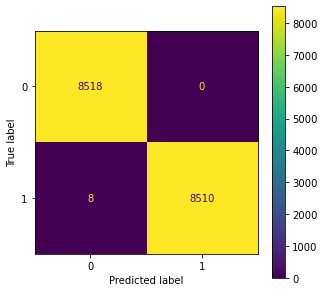

----------------------------------------
Plot ROC on train data


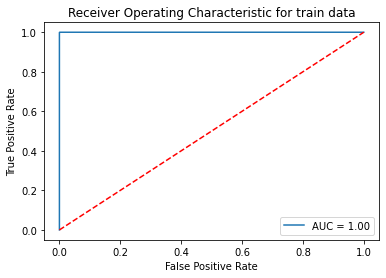

----------------------------------------
Classification report on test data.
              precision    recall  f1-score   support

           0       0.91      0.55      0.69     22603
           1       0.13      0.55      0.22      2839

    accuracy                           0.55     25442
   macro avg       0.52      0.55      0.45     25442
weighted avg       0.82      0.55      0.63     25442

----------------------------------------
Precision score on test data:  0.8209840612705174
----------------------------------------
Confusion matrix on test data


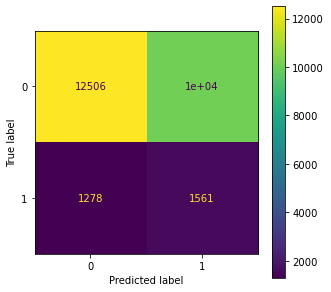

----------------------------------------
Plot ROC on test data


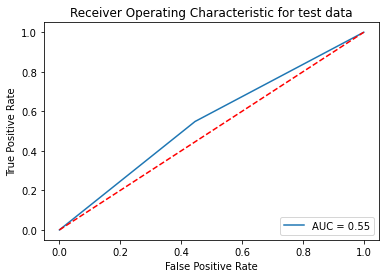

----------------------------------------
----------------------------------------
TPR on train data:  0.9990608123972764
FPR on train data:  0.0
----------------------------------------
----------------------------------------
TPR on test data:  0.549841493483621
FPR on test data:  0.0
----------------------------------------
{'fit_time': array([1.58729792, 1.7312963 , 1.75557375, 1.68329883, 1.69929814]),
 'score_time': array([0.00800014, 0.00799799, 0.0077374 , 0.00800967, 0.00799966]),
 'test_accuracy': array([0.53638498, 0.54476079, 0.53742295, 0.54886997, 0.55679483]),
 'test_f1': array([0.5380117 , 0.54207263, 0.53971963, 0.55436358, 0.55457227]),
 'test_precision': array([0.53613054, 0.54545455, 0.5372093 , 0.54753723, 0.55720213]),
 'test_recall': array([0.5399061 , 0.53873239, 0.54225352, 0.5613623 , 0.55196712]),
 'test_roc_auc': array([0.53638498, 0.54476256, 0.53742153, 0.54887364, 0.55679342]),
 'train_accuracy': array([0.99948635, 0.99963314, 0.99963314, 0.99963314, 0.999

In [567]:
decision_tree_evaluation = modelEvaluation(decisionTree,X_train,X_test,y_train,y_test)

#### Observation
* Model has 100% accuracy on train data with 100% value on precision and recall.
* Also, the ROC for train data is with AUC as 1.
* Whereas, with cross-validation the model performance is not good. With f1 score of 54.57% and AUC of 0.54.
* This shows that model is overfitting as its performance with cross validation is not good.
* The model accuracy on test data is 55% and AUC is also 55%.

#### Creating dataframe of model performance for model comparison

In [568]:
models_performance = pd.DataFrame(decision_tree_evaluation,index=[0])
models_performance

,model,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc,test_cv_accuracy,test_cv_precision,test_cv_recall,test_cv_f1,test_cv_roc_auc
0,DecisionTreeClassifier,0.99953,1.0,0.999061,0.99953,0.99953,0.552905,0.133899,0.549841,0.215355,0.551565,0.544847,0.544707,0.546844,0.545748,0.544847


As seen from the above classification report model has 100% accuracy on training data.

#### Hypertuning decision tree

In [569]:
param_grid_dt = {'criterion': ['gini', 'entropy'], 
     'splitter': ["best", "random"],
     'max_depth': [None,5, 10, 20, 50, 100, 500],
     'min_samples_split': [2 ,5, 10, 100, 500],
     'class_weight': ['balanced']
    }

Best params for  DecisionTreeClassifier :
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 500, 'splitter': 'random'}
----------------------------------------
----------------------------------------
Classification report on train data.
              precision    recall  f1-score   support

           0       0.62      0.72      0.67      8518
           1       0.67      0.57      0.61      8518

    accuracy                           0.64     17036
   macro avg       0.64      0.64      0.64     17036
weighted avg       0.64      0.64      0.64     17036

----------------------------------------
Precision score on training data:  0.6448617486410106
----------------------------------------
Confusion matrix on train data


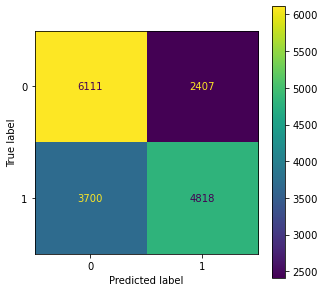

----------------------------------------
Plot ROC on train data


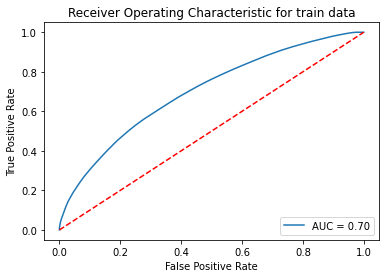

----------------------------------------
Classification report on test data.
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     22603
           1       0.17      0.53      0.26      2839

    accuracy                           0.66     25442
   macro avg       0.55      0.61      0.52     25442
weighted avg       0.84      0.66      0.72     25442

----------------------------------------
Precision score on test data:  0.8374740399661383
----------------------------------------
Confusion matrix on test data


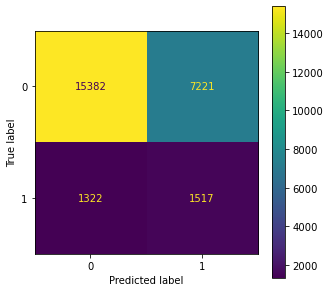

----------------------------------------
Plot ROC on test data


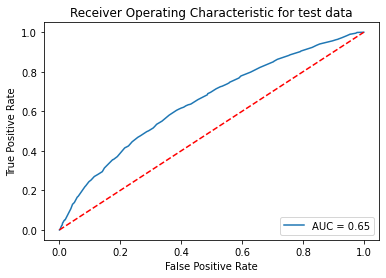

----------------------------------------
----------------------------------------
TPR on train data:  0.5656257337403147
FPR on train data:  0.2825780699694764
----------------------------------------
----------------------------------------
TPR on test data:  0.5343430785487848
FPR on test data:  0.10649028889970358
----------------------------------------
{'fit_time': array([0.1599977 , 0.21690059, 0.20937657, 0.20267439, 0.21690059]),
 'score_time': array([0.00799942, 0.00731373, 0.00971317, 0.00629711, 0.00731373]),
 'test_accuracy': array([0.60856808, 0.62283534, 0.62254183, 0.61138832, 0.6022894 ]),
 'test_f1': array([0.60226595, 0.63254218, 0.6060049 , 0.59236453, 0.60644787]),
 'test_precision': array([0.61212121, 0.61684328, 0.63397436, 0.62265372, 0.6       ]),
 'test_recall': array([0.592723  , 0.64906103, 0.58039906, 0.5648855 , 0.61303582]),
 'test_roc_auc': array([0.60856808, 0.62282764, 0.6225542 , 0.61137467, 0.60229256]),
 'train_accuracy': array([0.63897857, 0.6379044

In [571]:
best_dt,dt_best_params,hypertune_dt_evaluation = hypertune_model(decisionTree,param_grid_dt,X_train,X_test,y_train,y_test)

In [572]:
models_performance = models_performance.append(hypertune_dt_evaluation,ignore_index=True)

In [573]:
models_performance

,model,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc,test_cv_accuracy,test_cv_precision,test_cv_recall,test_cv_f1,test_cv_roc_auc
0,DecisionTreeClassifier,0.999530,1.000000,0.999061,0.999530,0.999530,0.552905,0.133899,0.549841,0.215355,0.551565,0.544847,0.544707,0.546844,0.545748,0.544847
1,DecisionTreeClassifier_hypertuned,0.641524,0.666851,0.565626,0.612082,0.641524,0.664217,0.173610,0.534343,0.262071,0.607436,0.613525,0.617119,0.600021,0.607925,0.613523


#### Observation
* Model has 64% accuracy on train data with 67% value on precision and 57% on recall.
* Also, the ROC for train data is with AUC as 0.7 .
* Whereas, with cross-validation the model performance is similar. With f1 score of 60% and AUC of 0.61 .
* This shows that model is better than without hypertuning as its performance with cross validation is also similar good.
* The model accuracy on test data is 66% and AUC is also 60%.

#### Training on Naive Bayes

In [575]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train.toarray(),y_train)

GaussianNB()

#### Evaluating Naive Bayes

----------------------------------------
Classification report on train data.
              precision    recall  f1-score   support

           0       0.75      0.05      0.10      8518
           1       0.51      0.98      0.67      8518

    accuracy                           0.52     17036
   macro avg       0.63      0.52      0.38     17036
weighted avg       0.63      0.52      0.38     17036

----------------------------------------
Precision score on training data:  0.6303751224466987
----------------------------------------
Confusion matrix on train data


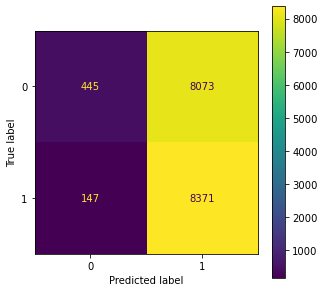

----------------------------------------
Plot ROC on train data


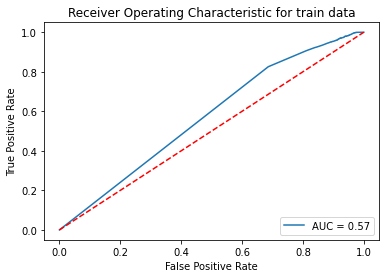

----------------------------------------
Classification report on test data.
              precision    recall  f1-score   support

           0       0.95      0.05      0.10     22603
           1       0.11      0.98      0.21      2839

    accuracy                           0.15     25442
   macro avg       0.53      0.52      0.15     25442
weighted avg       0.86      0.15      0.11     25442

----------------------------------------
Precision score on test data:  0.8590902072243229
----------------------------------------
Confusion matrix on test data


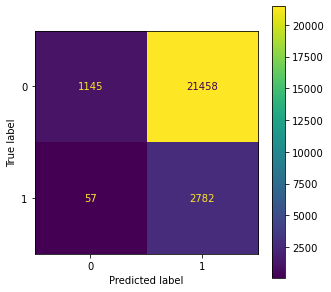

----------------------------------------
Plot ROC on test data


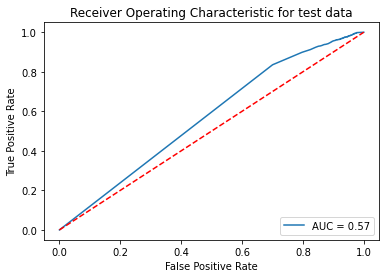

----------------------------------------
----------------------------------------
TPR on train data:  0.982742427799953
FPR on train data:  0.9477576895984973
----------------------------------------
----------------------------------------
TPR on test data:  0.9799225079253259
FPR on test data:  0.35716497810025216
----------------------------------------
{'fit_time': array([0.15235519, 0.15235519, 0.16034961, 0.15235519, 0.16034961]),
 'score_time': array([0.04799771, 0.05598712, 0.04799271, 0.04799771, 0.05600643]),
 'test_accuracy': array([0.51819249, 0.51540945, 0.51071324, 0.51775756, 0.51628999]),
 'test_f1': array([0.67041349, 0.66854045, 0.66639984, 0.66881677, 0.66814337]),
 'test_precision': array([0.50945699, 0.50808666, 0.50561798, 0.5092081 , 0.50842783]),
 'test_recall': array([0.98004695, 0.97711268, 0.97711268, 0.97416324, 0.97416324]),
 'test_roc_auc': array([0.51819249, 0.5152739 , 0.5105763 , 0.51789148, 0.51642434]),
 'train_accuracy': array([0.51621661, 0.51992076

In [577]:
nb_evaluation = modelEvaluation(nb,X_train.toarray(),X_test.toarray(),y_train,y_test)

In [578]:
models_performance = models_performance.append(nb_evaluation,ignore_index=True)
models_performance

,model,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc,test_cv_accuracy,test_cv_precision,test_cv_recall,test_cv_f1,test_cv_roc_auc
0,DecisionTreeClassifier,0.999530,1.000000,0.999061,0.999530,0.999530,0.552905,0.133899,0.549841,0.215355,0.551565,0.544847,0.544707,0.546844,0.545748,0.544847
1,DecisionTreeClassifier_hypertuned,0.641524,0.666851,0.565626,0.612082,0.641524,0.664217,0.173610,0.534343,0.262071,0.607436,0.613525,0.617119,0.600021,0.607925,0.613523
2,GaussianNB,0.517492,0.509061,0.982742,0.670699,0.517492,0.154351,0.114769,0.979923,0.205473,0.515290,0.515673,0.508160,0.976520,0.668463,0.515672


#### Observation
* Model has 52% accuracy on train data with 51% value on precision and 98% recall.
* Also, the ROC for train data is with AUC as 0.57 .
* Whereas, with cross-validation the model performance is similar. With f1 score of 66.68% and AUC of 0.51.
* This shows that model is performing okay but not better as compared to hypertuned decision tree.
* The model accuracy on test data is 15% and AUC is also 51%.

#### Hypertuning Naive Bayes

In [579]:
import numpy as np
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

Best params for  GaussianNB :
{'var_smoothing': 0.02310129700083159}
----------------------------------------
----------------------------------------
Classification report on train data.
              precision    recall  f1-score   support

           0       0.57      0.80      0.67      8518
           1       0.67      0.40      0.50      8518

    accuracy                           0.60     17036
   macro avg       0.62      0.60      0.59     17036
weighted avg       0.62      0.60      0.59     17036

----------------------------------------
Precision score on training data:  0.6227806546235537
----------------------------------------
Confusion matrix on train data


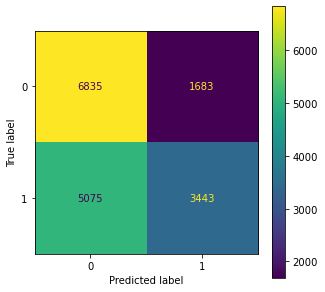

----------------------------------------
Plot ROC on train data


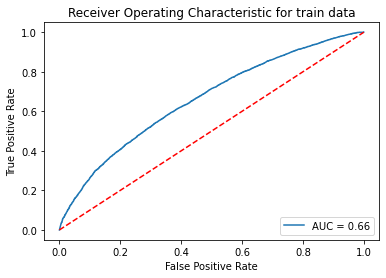

----------------------------------------
Classification report on test data.
              precision    recall  f1-score   support

           0       0.91      0.79      0.85     22603
           1       0.19      0.38      0.25      2839

    accuracy                           0.75     25442
   macro avg       0.55      0.59      0.55     25442
weighted avg       0.83      0.75      0.78     25442

----------------------------------------
Precision score on test data:  0.8307527117363157
----------------------------------------
Confusion matrix on test data


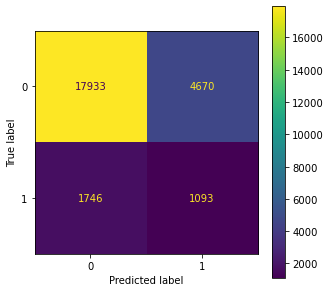

----------------------------------------
Plot ROC on test data


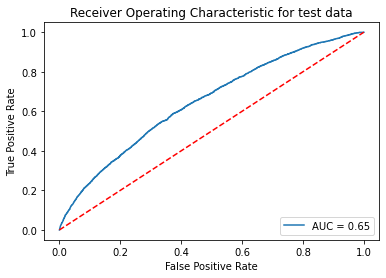

----------------------------------------
----------------------------------------
TPR on train data:  0.4042028645221883
FPR on train data:  0.1975815919229866
----------------------------------------
----------------------------------------
TPR on test data:  0.38499471644945404
FPR on test data:  0.07445914259169137
----------------------------------------
{'fit_time': array([0.04800081, 0.05601144, 0.08000803, 0.04944205, 0.05601144]),
 'score_time': array([0.03998446, 0.01599884, 0.02400231, 0.01456332, 0.02399659]),
 'test_accuracy': array([0.57687793, 0.61432345, 0.6110948 , 0.59407103, 0.59671265]),
 'test_f1': array([0.45952024, 0.52597403, 0.52114203, 0.49690797, 0.49448124]),
 'test_precision': array([0.63589212, 0.68258427, 0.67826905, 0.65296367, 0.66206897]),
 'test_recall': array([0.35974178, 0.4278169 , 0.42312207, 0.40105696, 0.39459777]),
 'test_roc_auc': array([0.57687793, 0.61437821, 0.61114999, 0.59401439, 0.59665334]),
 'train_accuracy': array([0.61036102, 0.602978

In [580]:
best_nb,nb_best_params,hypertune_nb_evaluation = hypertune_model(nb,params_NB,X_train.toarray(),X_test.toarray(),y_train,y_test)

In [581]:
models_performance = models_performance.append(hypertune_nb_evaluation,ignore_index=True)
models_performance

,model,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc,test_cv_accuracy,test_cv_precision,test_cv_recall,test_cv_f1,test_cv_roc_auc
0,DecisionTreeClassifier,0.999530,1.000000,0.999061,0.999530,0.999530,0.552905,0.133899,0.549841,0.215355,0.551565,0.544847,0.544707,0.546844,0.545748,0.544847
1,DecisionTreeClassifier_hypertuned,0.641524,0.666851,0.565626,0.612082,0.641524,0.664217,0.173610,0.534343,0.262071,0.607436,0.613525,0.617119,0.600021,0.607925,0.613523
2,GaussianNB,0.517492,0.509061,0.982742,0.670699,0.517492,0.154351,0.114769,0.979923,0.205473,0.515290,0.515673,0.508160,0.976520,0.668463,0.515672
3,GaussianNB_hypertuned,0.603311,0.671674,0.404203,0.504691,0.603311,0.747819,0.189658,0.384995,0.254127,0.589192,0.598616,0.662356,0.401267,0.499605,0.598615


#### Observation
* Model has 60% accuracy on train data with 67% value on precision and 40% on recall.
* Also, the ROC for train data is with AUC as  0.66 .
* Whereas, with cross-validation the model performance is similar. With f1 score of 49.96% and AUC of 0.59.
* This shows that model is performing better compared to non-hypertuned Naive bayes. But Hypertuned decision tree is performing the best so far.
* The model accuracy on test data is 74% and AUC is also 58.98%.

#### Training Random Forest

In [582]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(criterion='gini',random_state=42)
randomForest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

----------------------------------------
Classification report on train data.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8518
           1       1.00      1.00      1.00      8518

    accuracy                           1.00     17036
   macro avg       1.00      1.00      1.00     17036
weighted avg       1.00      1.00      1.00     17036

----------------------------------------
Precision score on training data:  0.9995306540488952
----------------------------------------
Confusion matrix on train data


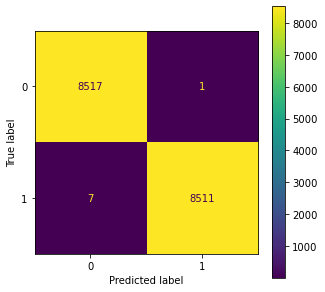

----------------------------------------
Plot ROC on train data


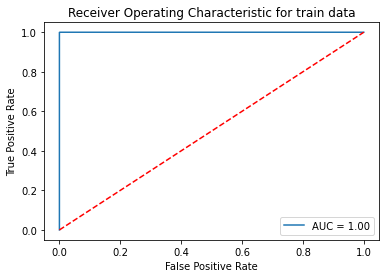

----------------------------------------
Classification report on test data.
              precision    recall  f1-score   support

           0       0.93      0.62      0.74     22603
           1       0.17      0.60      0.26      2839

    accuracy                           0.62     25442
   macro avg       0.55      0.61      0.50     25442
weighted avg       0.84      0.62      0.69     25442

----------------------------------------
Precision score on test data:  0.8406868778842974
----------------------------------------
Confusion matrix on test data


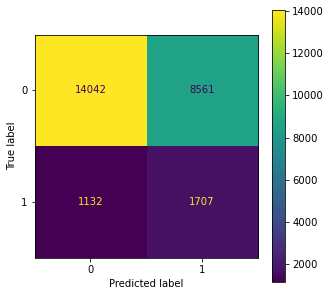

----------------------------------------
Plot ROC on test data


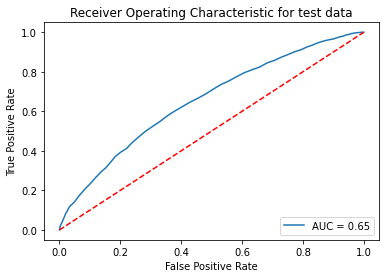

----------------------------------------
----------------------------------------
TPR on train data:  0.9991782108476168
FPR on train data:  0.00011739845034045551
----------------------------------------
----------------------------------------
TPR on test data:  0.6012680521310321
FPR on test data:  4.4241914790072115e-05
----------------------------------------
{'fit_time': array([16.18107843, 16.28599072, 16.35799479, 16.16516376, 15.85316658]),
 'score_time': array([0.09691525, 0.07999492, 0.08800673, 0.0968256 , 0.08799767]),
 'test_accuracy': array([0.5883216 , 0.60199589, 0.61080129, 0.59583211, 0.60551805]),
 'test_f1': array([0.57702743, 0.59401198, 0.61273364, 0.59151587, 0.59297396]),
 'test_precision': array([0.5933044 , 0.60635697, 0.60988372, 0.59772182, 0.61225766]),
 'test_recall': array([0.56161972, 0.58215962, 0.61561033, 0.58543746, 0.57486788]),
 'test_roc_auc': array([0.5883216 , 0.60200171, 0.61079988, 0.59582906, 0.60550906]),
 'train_accuracy': array([0.9994863

In [583]:
random_forest_evaluation = modelEvaluation(randomForest,X_train,X_test,y_train,y_test)

In [584]:
models_performance = models_performance.append(random_forest_evaluation,ignore_index=True)
models_performance

,model,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc,test_cv_accuracy,test_cv_precision,test_cv_recall,test_cv_f1,test_cv_roc_auc
0,DecisionTreeClassifier,0.999530,1.000000,0.999061,0.999530,0.999530,0.552905,0.133899,0.549841,0.215355,0.551565,0.544847,0.544707,0.546844,0.545748,0.544847
1,DecisionTreeClassifier_hypertuned,0.641524,0.666851,0.565626,0.612082,0.641524,0.664217,0.173610,0.534343,0.262071,0.607436,0.613525,0.617119,0.600021,0.607925,0.613523
2,GaussianNB,0.517492,0.509061,0.982742,0.670699,0.517492,0.154351,0.114769,0.979923,0.205473,0.515290,0.515673,0.508160,0.976520,0.668463,0.515672
3,GaussianNB_hypertuned,0.603311,0.671674,0.404203,0.504691,0.603311,0.747819,0.189658,0.384995,0.254127,0.589192,0.598616,0.662356,0.401267,0.499605,0.598615
4,RandomForestClassifier,0.999530,0.999883,0.999178,0.999530,0.999530,0.619016,0.166245,0.601268,0.260472,0.611257,0.600494,0.603905,0.583939,0.593653,0.600492


#### Observation
* Model has 100% accuracy on train data with 100% value on precision and recall.
* Also, the ROC for train data is with AUC as 1.
* Whereas, with cross-validation the model performance is not good. With f1 score of 59.36% and AUC of 0.60 .
* This shows that model is overfitting as its performance with cross validation is not good.
* The model accuracy on test data is 61% and AUC is also 61%.

#### Hypertuning Random Forest

In [603]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Impurity measure
criterion = ['gini','entropy']
# Create the params grid
params_random_forest = {'max_features': max_features,
                        'max_depth': max_depth,
                        'criterion': criterion}

Best params for  RandomForestClassifier :
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}
----------------------------------------
----------------------------------------
Classification report on train data.
              precision    recall  f1-score   support

           0       0.68      0.71      0.70      8518
           1       0.70      0.67      0.68      8518

    accuracy                           0.69     17036
   macro avg       0.69      0.69      0.69     17036
weighted avg       0.69      0.69      0.69     17036

----------------------------------------
Precision score on training data:  0.6912391043456029
----------------------------------------
Confusion matrix on train data


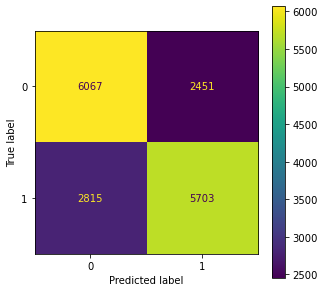

----------------------------------------
Plot ROC on train data


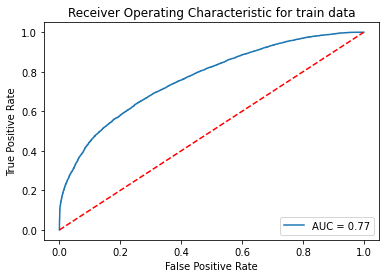

----------------------------------------
Classification report on test data.
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     22603
           1       0.17      0.61      0.27      2839

    accuracy                           0.63     25442
   macro avg       0.55      0.62      0.51     25442
weighted avg       0.84      0.63      0.70     25442

----------------------------------------
Precision score on test data:  0.844465124181566
----------------------------------------
Confusion matrix on test data


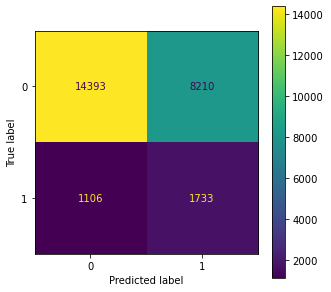

----------------------------------------
Plot ROC on test data


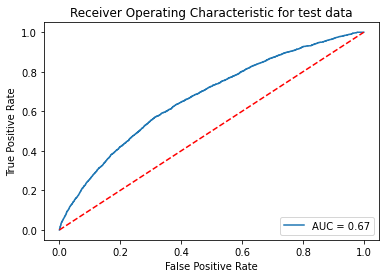

----------------------------------------
----------------------------------------
TPR on train data:  0.6695233622916178
FPR on train data:  0.28774360178445646
----------------------------------------
----------------------------------------
TPR on test data:  0.610426206410708
FPR on test data:  0.10843693315046675
----------------------------------------
{'fit_time': array([1.86016464, 1.93828559, 1.90703464, 1.76640677, 1.92266297]),
 'score_time': array([0.04686999, 0.03124642, 0.03125095, 0.04687643, 0.04686904]),
 'test_accuracy': array([0.61766432, 0.63663047, 0.62518345, 0.62371588, 0.61960669]),
 'test_f1': array([0.6035899 , 0.63329384, 0.63124459, 0.61731343, 0.61057692]),
 'test_precision': array([0.62665824, 0.63935407, 0.62137578, 0.62780814, 0.62523077]),
 'test_recall': array([0.58215962, 0.62734742, 0.64143192, 0.60716383, 0.59659425]),
 'test_roc_auc': array([0.61766432, 0.63663319, 0.62517868, 0.62371102, 0.61959994]),
 'train_accuracy': array([0.70428529, 0.6983637

In [604]:
best_random_forest,random_forest_best_params,hypertune_random_forest_evaluation = hypertune_model(randomForest,params_random_forest,X_train,X_test,y_train,y_test)

In [606]:
models_performance = models_performance.append(hypertune_random_forest_evaluation,ignore_index=True)
models_performance

,model,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc,test_cv_accuracy,test_cv_precision,test_cv_recall,test_cv_f1,test_cv_roc_auc
0,DecisionTreeClassifier,0.999530,1.000000,0.999061,0.999530,0.999530,0.552905,0.133899,0.549841,0.215355,0.551565,0.544847,0.544707,0.546844,0.545748,0.544847
1,DecisionTreeClassifier_hypertuned,0.641524,0.666851,0.565626,0.612082,0.641524,0.664217,0.173610,0.534343,0.262071,0.607436,0.613525,0.617119,0.600021,0.607925,0.613523
2,GaussianNB,0.517492,0.509061,0.982742,0.670699,0.517492,0.154351,0.114769,0.979923,0.205473,0.515290,0.515673,0.508160,0.976520,0.668463,0.515672
3,GaussianNB_hypertuned,0.603311,0.671674,0.404203,0.504691,0.603311,0.747819,0.189658,0.384995,0.254127,0.589192,0.598616,0.662356,0.401267,0.499605,0.598615
4,RandomForestClassifier,0.999530,0.999883,0.999178,0.999530,0.999530,0.619016,0.166245,0.601268,0.260472,0.611257,0.600494,0.603905,0.583939,0.593653,0.600492
5,RandomForestClassifier_hypertuned,0.690890,0.699411,0.669523,0.684141,0.690890,0.633834,0.174293,0.610426,0.271163,0.623600,0.624560,0.628085,0.610939,0.619204,0.624557


#### Observation
* Model has 69% accuracy on train data with 70% value on precision and 67% recall.
* Also, the ROC for train data is with AUC as 0.77.
* Whereas, with cross-validation the model performance is similar. With f1 score of 61.9% and AUC of 0.62 .
* This shows that model is performing good and better than non-hypertuned random forest.
* The model accuracy on test data is 63% and AUC is also 62%.

# Conclusion
* Hypertuned decision tree is the best performer with test acurracy 